# Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the train data

#### Since pandas is a bit slow in reading the 55 million rows of data from the train dataset, i began by generating a random sample dataset which is 20% of the original data set (about 11,000,000 rows)

In [2]:
New_York_Fair_train = pd.read_csv('TrainRandomSample(20%).csv')

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
New_York_Fair_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.84161,40.712278,1
1,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
2,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
3,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.99154,40.758138,2
4,2012-04-08 07:30:50.0000002,5.3,2012-04-08 07:30:50 UTC,-73.996335,40.737142,-73.980721,40.733559,1


# Data manipulation and cleaning

## View the number of rows and columns that the data has

In [4]:
New_York_Fair_train.shape


(11085890, 8)

## View the data types of the data in the various columns

In [5]:
New_York_Fair_train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude     object
dropoff_latitude      object
passenger_count        int64
dtype: object

## Drop the rows with zero entries in the dropoff_latitude and Dropoff_longitude columns

In [6]:
New_York_Fair_train = New_York_Fair_train.loc[(New_York_Fair_train[['dropoff_longitude', 'dropoff_latitude']] != 0).all(axis=1)]

### Verify that the rows have been dropped

In [7]:
New_York_Fair_train.shape

(10946938, 8)

## Drop off the unwanted columns (Key & pickup-datetime)

In [8]:
New_York_Fair_train = New_York_Fair_train.drop(['key', 'pickup_datetime'], axis=1)

#### Verify that the columns have been dropped.

In [9]:
New_York_Fair_train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

## Check the datatypes of the remaining columns

In [10]:
New_York_Fair_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10946938 entries, 0 to 11085889
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fare_amount        float64
 1   pickup_longitude   float64
 2   pickup_latitude    float64
 3   dropoff_longitude  object 
 4   dropoff_latitude   object 
 5   passenger_count    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 584.6+ MB


## Convert the object datatypes to numeric datatypes

In [11]:
New_York_Fair_train['dropoff_longitude'] = pd.to_numeric(New_York_Fair_train['dropoff_longitude'], errors = 'coerce')

In [12]:
New_York_Fair_train['dropoff_latitude'] = pd.to_numeric(New_York_Fair_train['dropoff_latitude'], errors = 'coerce')

### Confirm the conversion

In [13]:
New_York_Fair_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10946938 entries, 0 to 11085889
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   fare_amount        float64
 1   pickup_longitude   float64
 2   pickup_latitude    float64
 3   dropoff_longitude  float64
 4   dropoff_latitude   float64
 5   passenger_count    int64  
dtypes: float64(5), int64(1)
memory usage: 584.6 MB


## Check if the dataset has null values

In [14]:
New_York_Fair_train.isna().sum(axis=0)

fare_amount           0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    77
dropoff_latitude     77
passenger_count       0
dtype: int64

### Drop the rows with null values

In [15]:
New_York_Fair_train = New_York_Fair_train.dropna()

### Confirm that the nulls have been dropped

In [16]:
New_York_Fair_train.isna().sum(axis=0)

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Check for duplicates in the dataset

In [17]:
New_York_Fair_train.duplicated().sum()

72536

### Drop the duplicates

In [18]:
New_York_Fair_train = New_York_Fair_train.drop_duplicates()

In [19]:
# Confirm that the duplicates were dropped
New_York_Fair_train.duplicated().sum()

0

In [20]:
New_York_Fair_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,5.3,-73.968095,40.768008,-73.956655,40.783762,1
2,9.0,-74.006462,40.726713,-73.993078,40.731628,1
3,8.9,-73.980658,40.733873,-73.991540,40.758138,2
4,5.3,-73.996335,40.737142,-73.980721,40.733559,1


### Display the descriptive summary of the Fare_amounts

In [21]:
New_York_Fair_train['fare_amount'].describe()

count    1.087432e+07
mean     1.133677e+01
std      9.758028e+00
min     -3.000000e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      2.010900e+03
Name: fare_amount, dtype: float64

## Check the correlation by generating a correlation matrix

In [22]:
corr_matrix = New_York_Fair_train.corr()

### Visualize the matrix

<AxesSubplot:>

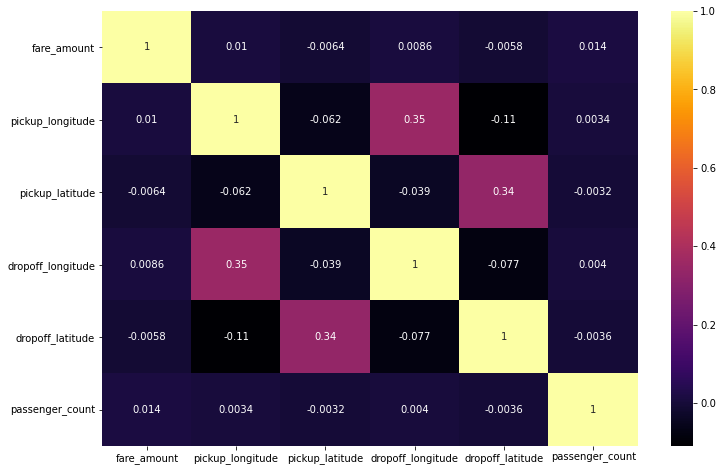

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot = True, cmap='inferno')

##### Since the goal is to predict the fare_amount, Fare_amount will be "y" and the other columns will be "x"

# Modelling

## We separate the "x" and the "y" variables

In [24]:
x = New_York_Fair_train.drop('fare_amount', axis=1)
y = New_York_Fair_train['fare_amount']

## Create the model

### Import the model metrics

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
### Split the data into test and Train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Instantiate the model

In [27]:
linear = LinearRegression()

### Train the model

In [28]:
linear.fit(x_train, y_train)

LinearRegression()

### Test the model

In [29]:
predictions = linear.predict(x_test)

### Evaluate the model

In [30]:
error = mean_squared_error(y_test, predictions, squared=True)
print(error)

95.55216833055036


# save the model

In [31]:
import joblib

In [32]:
joblib.dump(linear, 'regression.pkl')

['regression.pkl']

In [33]:
New_York_Fair_train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')